In [1]:
# Import all necessary libraies
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Load the Excel file
data = pd.read_excel('C:/Users/atuam/Documents/Uni_Classes/Yahoo/yahoo_data.xlsx')

# Display the first 5 rows of the dataset
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [4]:
data.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume           int64
dtype: object

### Visualizing the financial data

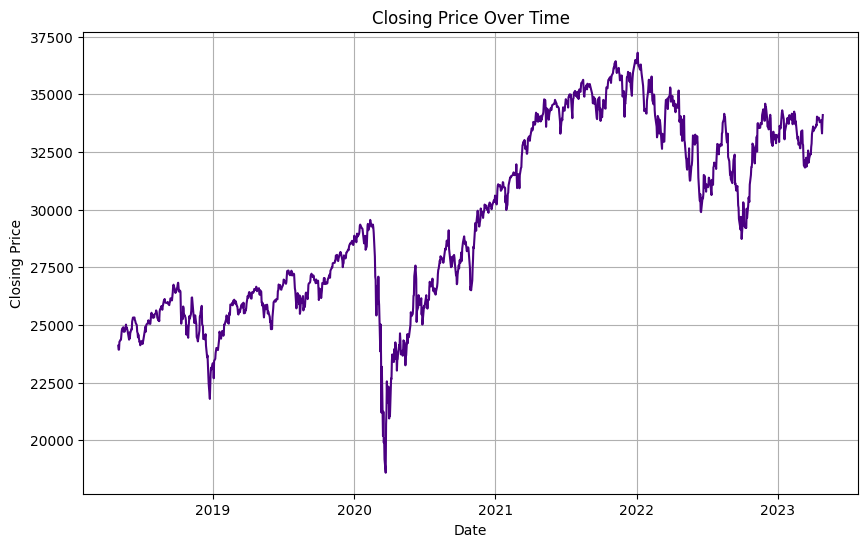

In [5]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the closing price of the asset over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close*'], color='indigo')  # Using 'Close*' column
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [6]:
# Check for null values in the DataFrame
null_values = data.isnull().sum()

# Display the count of null values for each column
print(null_values)

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64


In [7]:
# Display the column names of the DataFrame
column_names = data.columns
column_names

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

In [8]:
# Load the data
data = pd.read_excel('C:/Users/atuam/Documents/Uni_Classes/Yahoo/yahoo_data.xlsx')

# Data preprocessing
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Normalize numerical features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Adj Close**', 'Volume', 'Close*']])

# Split data into X (features) and y (target)
X = scaled_data[:, :-1]  # Input features (excluding 'Close*')
y = scaled_data[:, -1]   # Target variable ('Close*')

# Split data into training and testing sets
# Splitting the first 80% of data for training and the remaining 20% for testing
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the deep learning model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

Epoch 1/5
16/16 [==============================] - 5s 12ms/step - loss: 0.1795
Epoch 2/5
16/16 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 3/5
16/16 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 4/5
16/16 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 5/5
8/8 [==============================] - 1s 5ms/step
R-squared: 0.9597206725089782


In [9]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0019705681528041355
Root Mean Squared Error (RMSE): 0.04439108190621327


In [10]:
# Reshape predictions to match the shape of y_test
predictions = predictions.reshape(-1, 1)

# Now both y_test and predictions have the same shape
print("Shape of y_test:", y_test.shape)
print("Shape of predictions:", predictions.shape)

Shape of y_test: (252,)
Shape of predictions: (252, 1)


### Calculating the accuracy

In [11]:
# Calculate R-squared
r_squared = r2_score(y_test, predictions)

print("R-squared:", r_squared)

R-squared: 0.9597206725089782


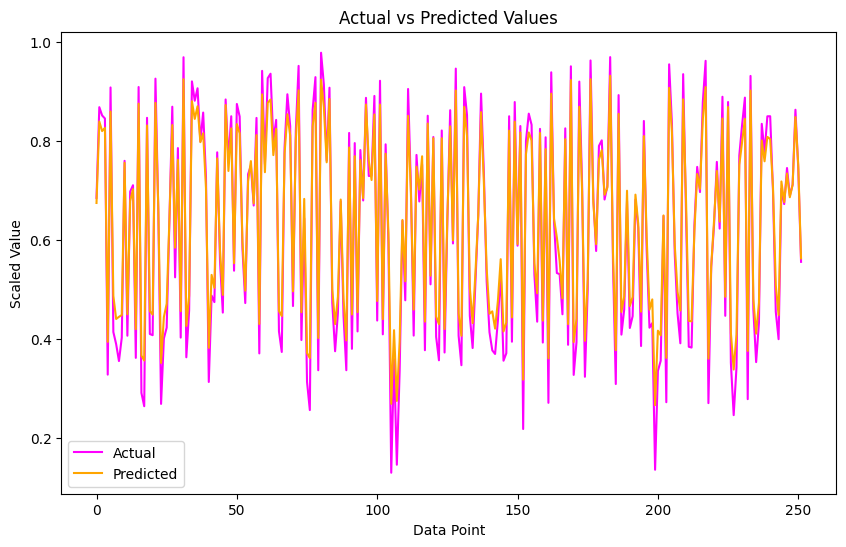

In [12]:
# Plotting real vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='magenta')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Scaled Value')  # I'm working with scaled values
plt.legend()
plt.show()


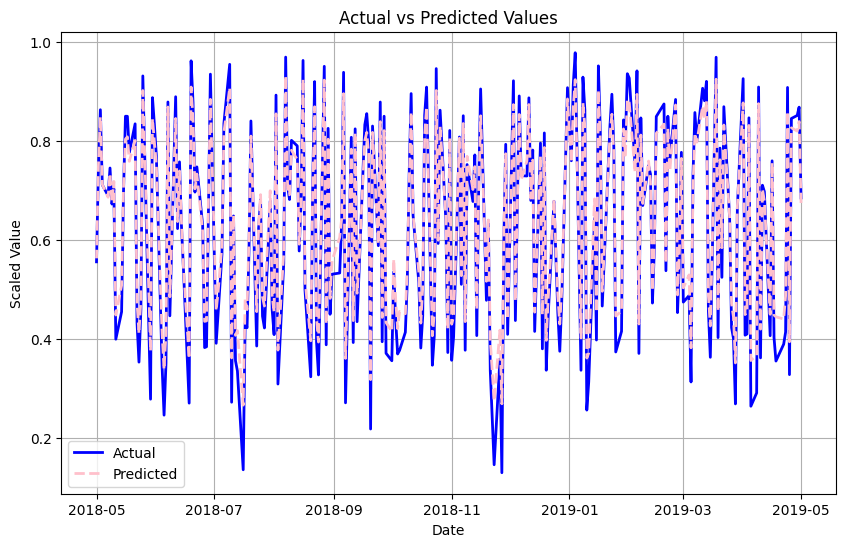

In [13]:
# Plotting real vs predicted values with dates
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][len(X_train):], y_test, label='Actual', color='blue', linewidth=2)
plt.plot(data['Date'][len(X_train):], predictions, label='Predicted', color='pink', linewidth=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Scaled Value')  # I'm working with scaled values
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()